# Problem Statement

**Data Analysis case study**

I am working on a logistic problem where they have faced cancellation of orders in their deliveries. 
Their main goal is to be the 1st prefered delivery partner in Africa.

Main objective is partnership, bringing together both drivers and businesses for the 24hr delivery services.

**Challenge 1**
1. Analyse order cancellations
2. visualize most important aspects using your prefered method.
3. document steps 
4. Insights on how to reduce number of cancelled orders.

**Challenge 2**

-There's been deliberate deletion of data
1. Use the data 2, missed data to predict cancellation reasons for all orders with missing data.
2. Document steps and method used.

**Challenge 3**

create a presentation for the relevant work done.

-In this Notebook, I will be looking at **Challenge 1**

# Import Packages

In [1]:
##for faster data processing
import numba as nb
import dask as da

#for data manipulation 
import pandas as pd
import numpy as np

##for data visualizations and distributions of the variables
import matplotlib as mtb
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import scipy as sc
import sklearn as skl
import seaborn as sns

%matplotlib inline

# Import datasets

In [2]:
query_df = pd.read_csv('../Sendy_data/analysis_df.csv', sep=',')


# EDA

In [3]:
# to view all the columns during EDA
pd.set_option('display.max_columns', 35)

In [4]:
#display the dataset
query_df.head()

,personal_or_business,business_number,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,confirmation_day,confirmation_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled
0,Personal,-1.0,Bike,Express,android,No driver has been allocated to my request.,Customer,1,17:55:38,1,NaN,1,17:56:35,9,-1.313053,36.841437,OnDemAND
1,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,12:26:27,1,12:27:36,1,12:28:44,14,-1.318959,36.853394,OnDemAND
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1,13:21:18,1,13:21:34,1,13:47:29,16,-1.313854,36.706867,OnDemAND
3,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,10:29:19,1,NaN,1,10:29:29,20,-1.206197,36.778776,OnDemAND
4,Personal,-1.0,Bike,Standard,ios,No Partner,Staff,1,14:34:05,1,14:59:08,1,15:49:41,11,-1.296958,36.808166,OnDemAND


In [5]:
#look at the distribution of each attribute by reviewing summary statistics
query_df.describe()

,business_number,placement_day,confirmation_day,cancellation_day,distance_(km),pickup_lat,pickup_long
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000
mean,13810.055060,3.674018,3.674018,3.674018,13.930862,-1.287768,36.814969
std,16276.500407,1.713099,1.713099,1.713099,45.310560,0.067094,0.113884
min,-1.000000,1.000000,1.000000,1.000000,0.000000,-2.390920,32.628902
25%,-1.000000,2.000000,2.000000,2.000000,5.000000,-1.315811,36.786055
50%,-1.000000,4.000000,4.000000,4.000000,9.000000,-1.291188,36.813105
75%,28396.000000,5.000000,5.000000,5.000000,16.000000,-1.263937,36.843238
max,62392.000000,7.000000,7.000000,7.000000,2061.000000,0.551064,40.689788


In [6]:
#look at the number of rows and columns in the dataset
query_df.shape

(6393, 17)

In [7]:
#look at the columns contained in the dataset 
query_df.columns

Index(['personal_or_business', 'business_number', 'vehicle_type',
       'standard_or_express', 'platform', 'cancel_reason', 'cancelled_by',
       'placement_day', 'placement_time', 'confirmation_day',
       'confirmation_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled'],
      dtype='object')

In [8]:
##look at the data types of the variables
query_df.dtypes

personal_or_business     object
business_number         float64
vehicle_type             object
standard_or_express      object
platform                 object
cancel_reason            object
cancelled_by             object
placement_day             int64
placement_time           object
confirmation_day          int64
confirmation_time        object
cancellation_day          int64
cancellation_time        object
distance_(km)             int64
pickup_lat              float64
pickup_long             float64
scheduled                object
dtype: object

In [9]:
#reset index
query_df=query_df.reset_index()

## Boxplot

**Review the spread of each attribute by looking at box and whisker plots.**


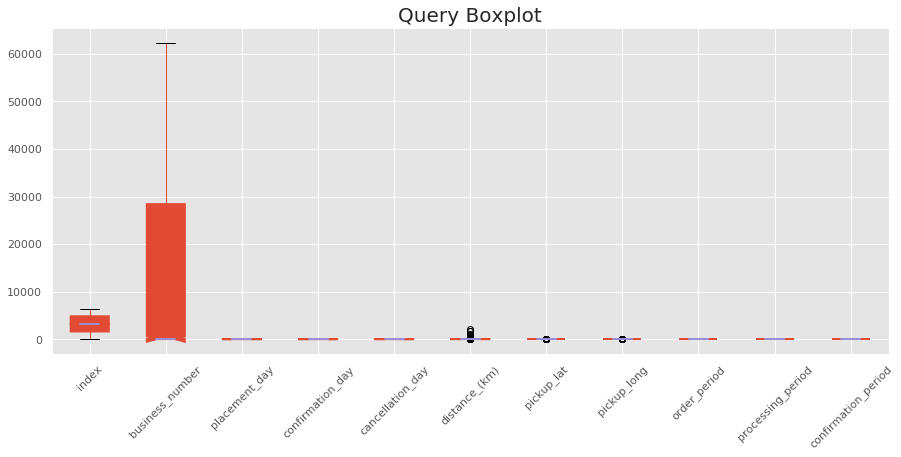

In [115]:
fig=plt.figure(figsize=(15,6))
query_df.boxplot(return_type='axes',
                 patch_artist=True, notch=True,
                    medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .75)
                );
plt.title('Query Boxplot', fontsize=20)
plt.xticks(rotation = 45);

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/dancilla/PYTHON_37/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/dancilla/PYTHON_37/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


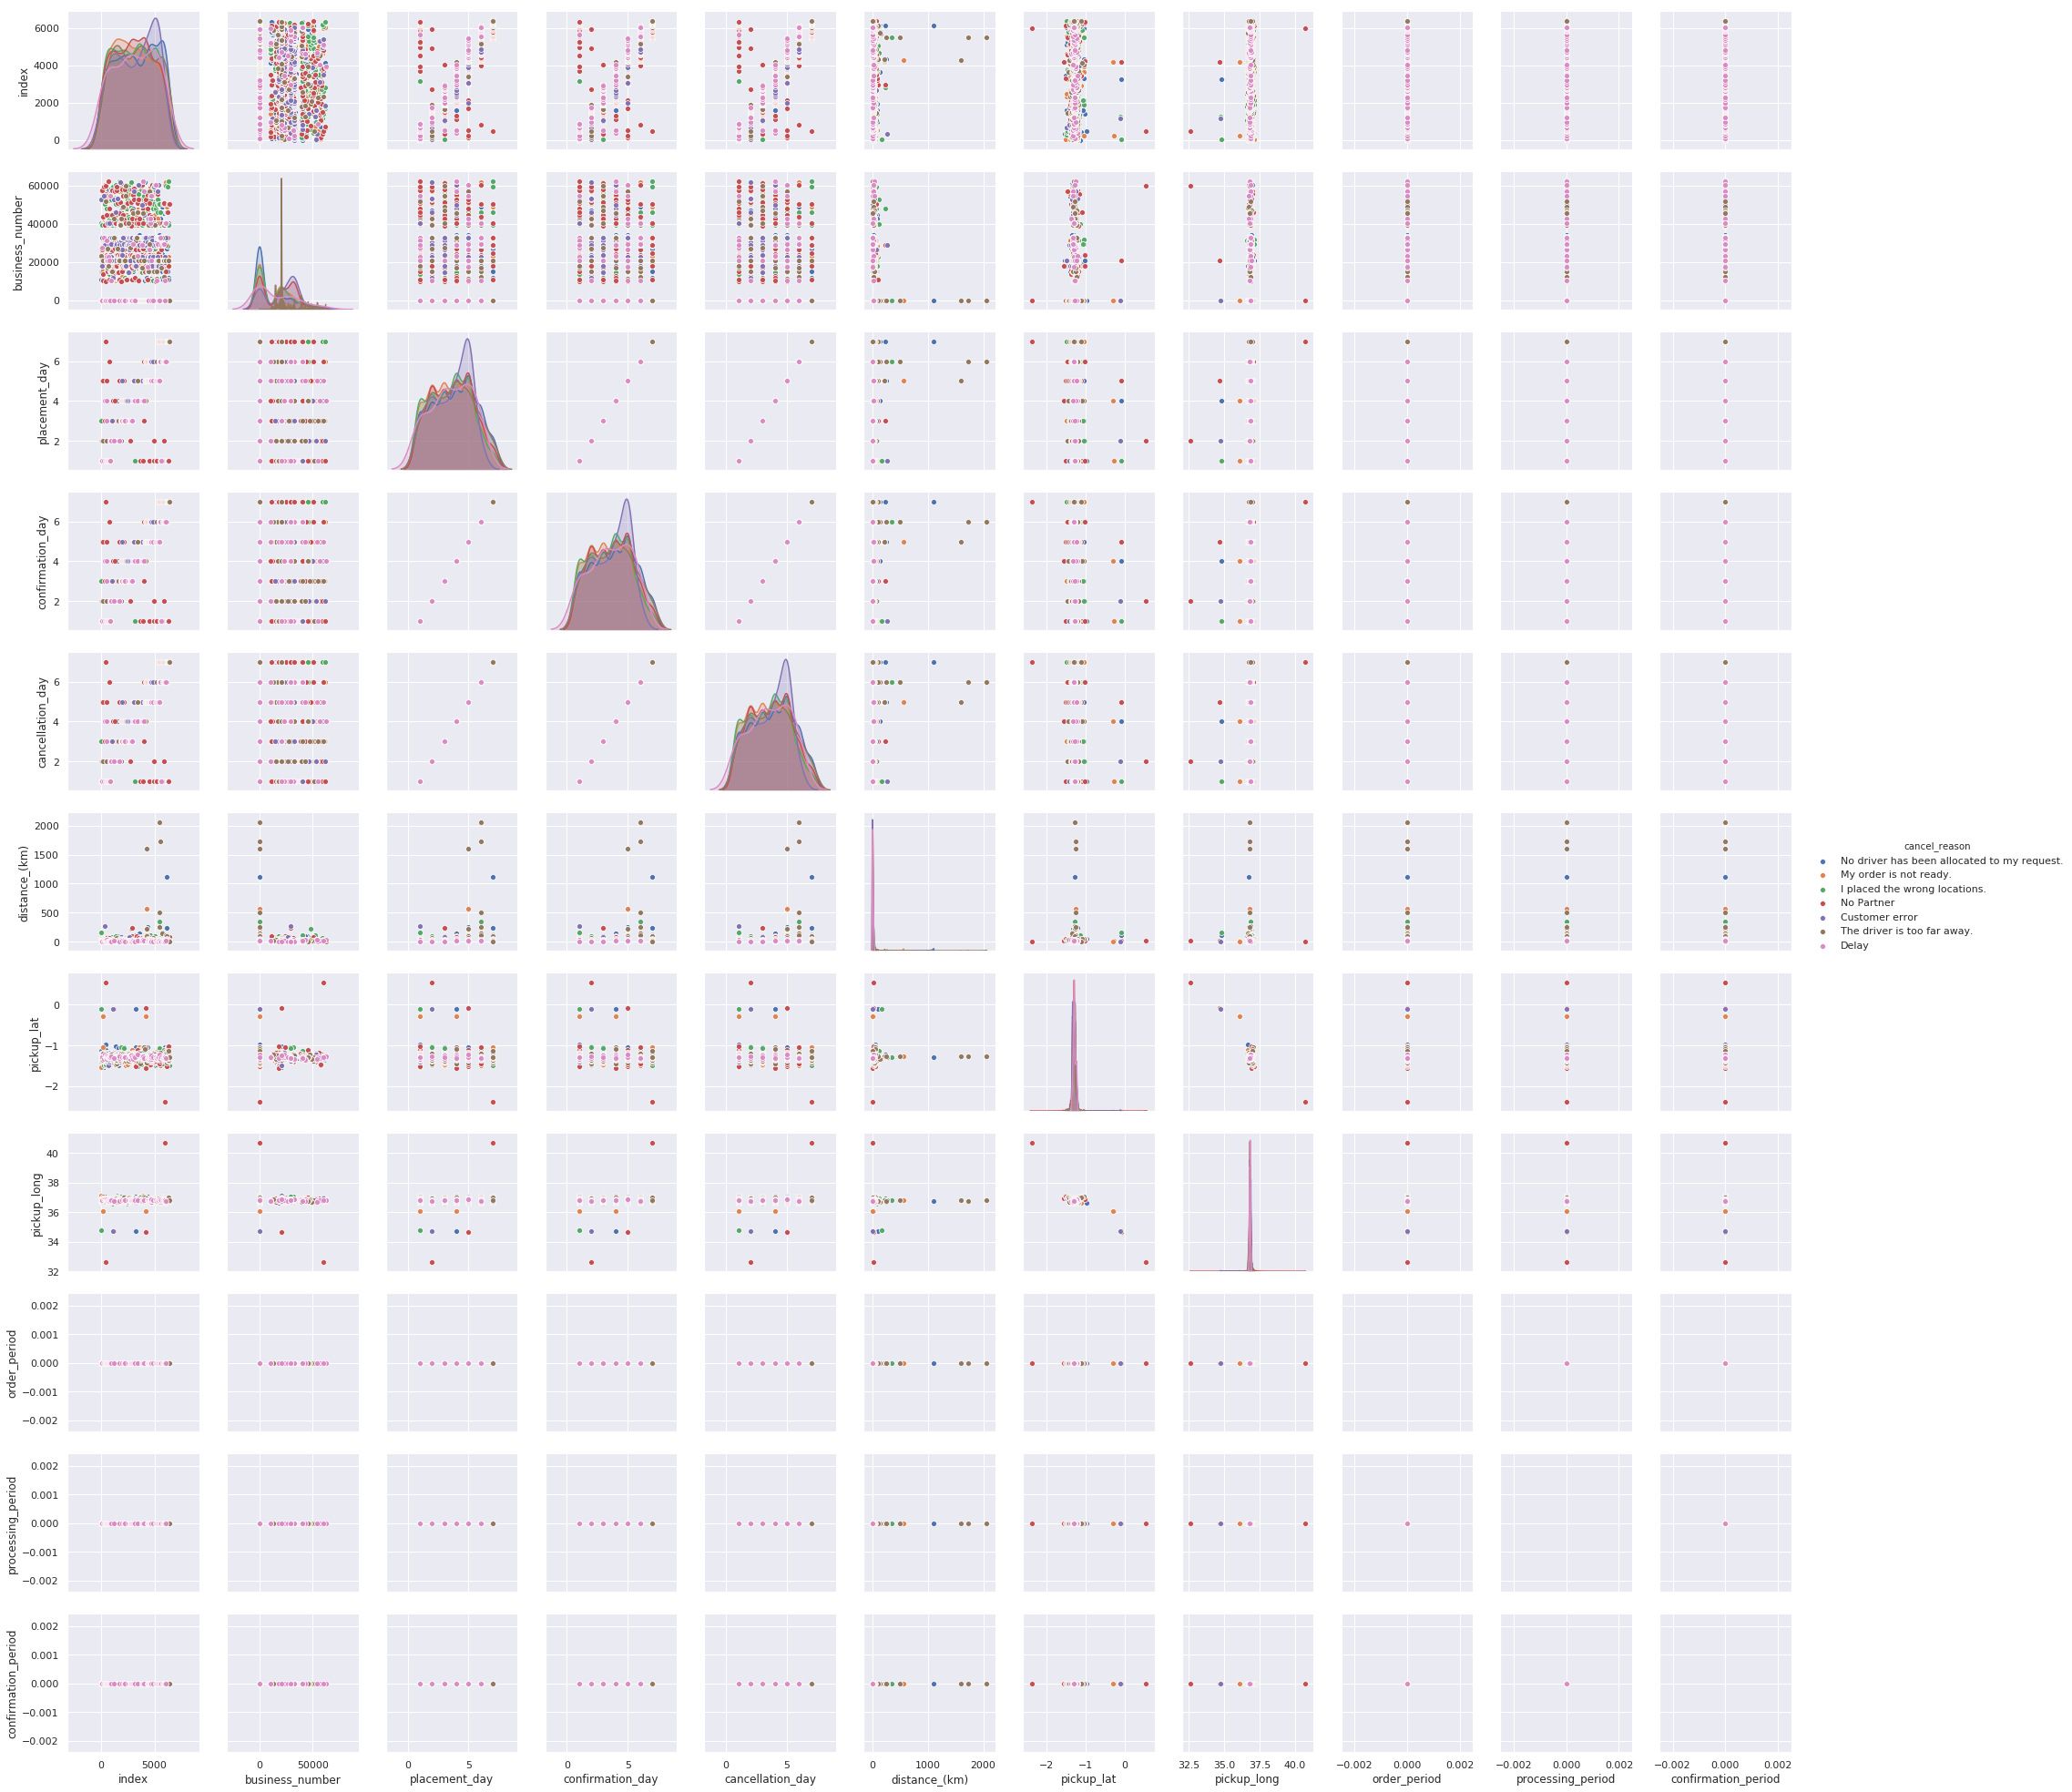

In [122]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(query_df, hue="cancel_reason")


In [123]:
query_df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['index', 'personal_or_business', 'business_number', 'vehicle_type',
       'standard_or_express', 'platform', 'cancel_reason', 'cancelled_by',
       'placement_day', 'placement_time', 'confirmation_day',
       'confirmation_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled',
       'order_timedelta', 'processing_timedelta', 'confirmation_timedelta',
       'order_period', 'processing_period', 'confirmation_period'],
      dtype='object')>

**Show the mean of a few variables**

In [124]:
print ( ('- Number of observations (datapoints) in the dataset:', len(query_df.index), '\n'))

print ( ('- Mean pickup (latitude, longitude):\n', query_df[['pickup_lat', 'pickup_long']].mean(axis=0), '\n') )
#print ( ('- Mean customer (customer:', query_df['personal_or_business'].mean(), '\n') )
print ( ('- Mean distance traveled (in km):', query_df['distance_(km)'].mean(), '\n') )
print ( ('- Mean number ofcancellation days', query_df['cancellation_day'].mean(), '\n') )

('- Number of observations (datapoints) in the dataset:', 6393, '\n')
('- Mean pickup (latitude, longitude):\n', pickup_lat     -1.287768
pickup_long    36.814969
dtype: float64, '\n')
('- Mean distance traveled (in km):', 13.930861880181448, '\n')
('- Mean number ofcancellation days', 3.6740184576880965, '\n')


## Correlation

In [125]:
#show association between variables in the dataframe by plotting a correlation matrix
query_df.corr()

,index,business_number,placement_day,confirmation_day,cancellation_day,distance_(km),pickup_lat,pickup_long,order_period,processing_period,confirmation_period
index,1.000000,-0.016740,0.943072,0.943072,0.943072,0.042830,-0.036331,0.056895,NaN,NaN,NaN
business_number,-0.016740,1.000000,-0.024353,-0.024353,-0.024353,-0.041149,-0.066078,0.045934,NaN,NaN,NaN
placement_day,0.943072,-0.024353,1.000000,1.000000,1.000000,0.047666,-0.040651,0.048434,NaN,NaN,NaN
confirmation_day,0.943072,-0.024353,1.000000,1.000000,1.000000,0.047666,-0.040651,0.048434,NaN,NaN,NaN
cancellation_day,0.943072,-0.024353,1.000000,1.000000,1.000000,0.047666,-0.040651,0.048434,NaN,NaN,NaN
distance_(km),0.042830,-0.041149,0.047666,0.047666,0.047666,1.000000,0.032725,-0.014479,NaN,NaN,NaN
pickup_lat,-0.036331,-0.066078,-0.040651,-0.040651,-0.040651,0.032725,1.000000,-0.626917,NaN,NaN,NaN
pickup_long,0.056895,0.045934,0.048434,0.048434,0.048434,-0.014479,-0.626917,1.000000,NaN,NaN,NaN
order_period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
processing_period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


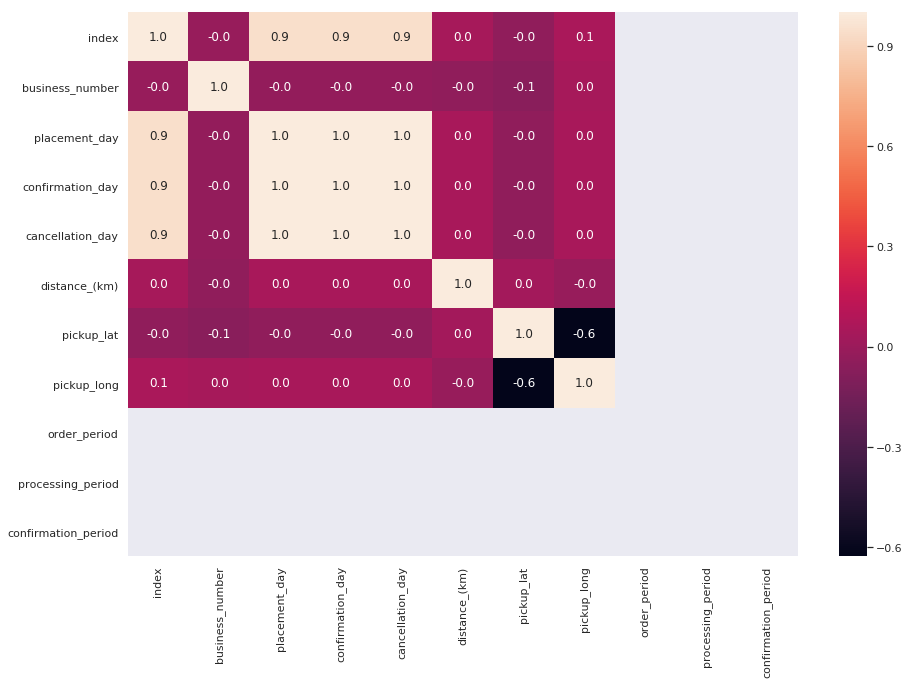

In [126]:
# Plot correlation matrix using a heatmap
#check the relationship between feautures and outputs using the heatmap(correlation) 
plt.figure(figsize=(15,10))
sns.heatmap(query_df.corr(), annot=True, fmt=".1f")
plt.show()


We can observe that most of the variables are associated or collerated.

when it tends to 1, it shows it has a relation, and as it tends to -1, it shows a weak relation.

**from the heatmap above we can observe that the days were highly collerated with a 1.0 colleration and the langitude and longitude were the lowest collerated with a -0.6 colleration level**

We can observe that most of the variables are associated or collerated.

when it tends to 1, it shows it has a relation, and as it tends to -1, it shows a weak relation.

## Show the distribution of the platforms customers use to make orders

android     2742
desktop     2382
ios          796
API          472
peer_web       1
Name: platform, dtype: int64


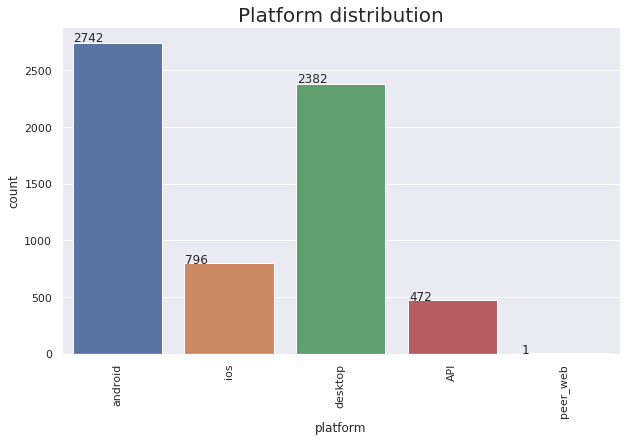

In [127]:
plt.figure(figsize=(10,6))
print ( query_df['platform'].value_counts() )
ax=sns.countplot(data = query_df, x = 'platform')

total = float(len(query_df)) # one person per row
# Add this loop to add the annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Platform distribution', fontsize=20)
plt.xticks(rotation = 90);


**We can observe that many customers were using android devices followed by the desktop in terms of popular use.
Dig deeper to see between if orders were made by businesses or individuals**

# Analyse the order cancellations

1. look at the most popular order cancel reasons.
2. Plot the distribution of cancel reasons.
3. look at the relationship between the variables and the cancellation reasons.
        3.1. look at the cancel reasons and vehicle type.
        3.2 look at the cancel reasons and the platform used,
        3.3 look at the person who scheduled vs cancel reasons.
        3.4 look at the cancel reasons and the type of order. 
4. Observe the timelines 
5. Recommendations.

In [16]:
#query_df['cancel_reason'].plot(kind='hist', bin=100)
#plt.xlabel("cancel reasons")
query_df['cancel_reason'].describe()

count                                            6393
unique                                              7
top       No driver has been allocated to my request.
freq                                             1773
Name: cancel_reason, dtype: object

In [17]:
query_df['cancel_reason'].value_counts()

No driver has been allocated to my request.    1773
No Partner                                     1293
My order is not ready.                         1212
I placed the wrong locations.                  1113
The driver is too far away.                     594
Customer error                                  337
Delay                                            71
Name: cancel_reason, dtype: int64

**I have observed that  'No driver has been allocated to my request' value on cancel reasons has the highest count of 1773 that is 
27.7% of the total reasons**

### Nested pie chart to observe the cancel reasons distribution

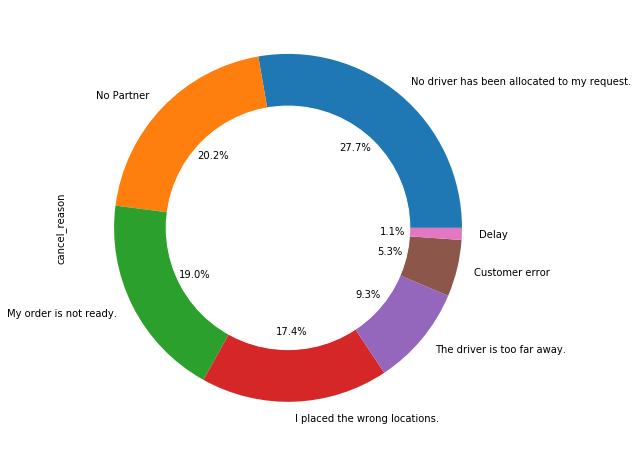

In [18]:
#count the number of rows for each cancel_reason
query_df['cancel_reason'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,8))

# add a circle at the center

my_circle=plt.Circle( (0,0), 0.7, color='white')

p=plt.gcf()
p.gca().add_artist(my_circle)
    
plt.xticks(rotation = 90);


**The main reasons for cancellations observed was that no driver has been allocated to my request.**

### Distribution of Cancelled Reasons in terms of  platform 

cancel_reason                                platform
Customer error                               API         129
                                             android      69
                                             desktop     116
                                             ios          23
Delay                                        API           3
                                             android      18
                                             desktop      34
                                             ios          16
I placed the wrong locations.                android     518
                                             desktop     470
                                             ios         124
                                             peer_web      1
My order is not ready.                       android     504
                                             desktop     558
                                             ios         150
No Partner                     

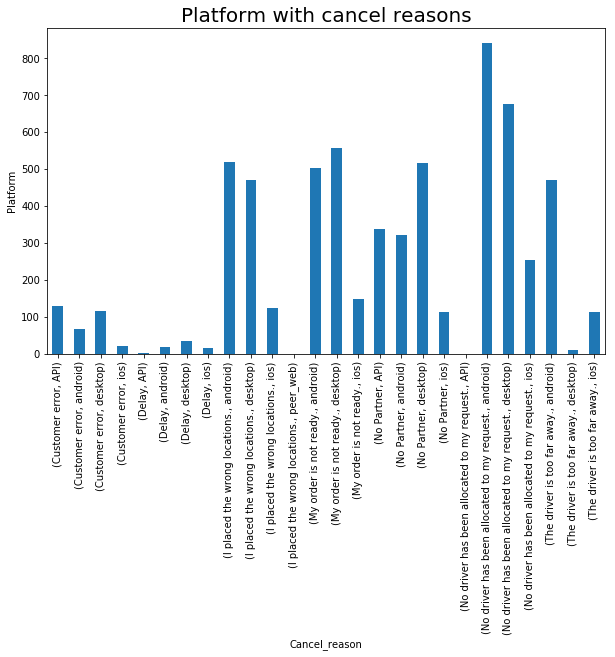

In [19]:
%matplotlib inline
#fig=plt.figure(figsize=(20,10))

print ( query_df.groupby(['cancel_reason','platform'])['platform'].count() )
from matplotlib.ticker import FuncFormatter
query_df.groupby(['cancel_reason','platform'])['platform'].count().plot.bar(figsize=(10,6))

plt.xlabel("Cancel_reason")
plt.ylabel("Platform")
plt.title('Platform with cancel reasons', fontsize=20)
plt.xticks(rotation = 90);


### Distribution of who placed the order vs the platforms used 

In [20]:
query_df.groupby(['personal_or_business','platform'])['personal_or_business'].count()


personal_or_business  platform
Business              API          472
                      android      384
                      desktop     2127
                      ios           76
Personal              android     2358
                      desktop      255
                      ios          720
                      peer_web       1
Name: personal_or_business, dtype: int64

This shows that the most popular reason for order cancellation was No driver has been allocated to my request mainly using an android device. 

This followed by No driver has been allocated to my request mainly using a desktop.

### Cancelled reasons vs vehicle type

In [21]:
query_df['vehicle_type'].value_counts()

Bike             6385
Standard Bike       8
Name: vehicle_type, dtype: int64

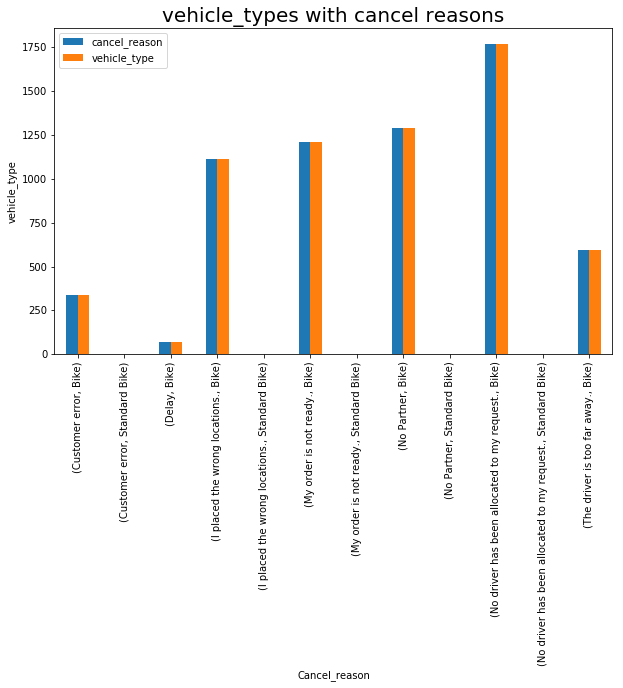

In [22]:
%matplotlib inline
#fig=plt.figure(figsize=(20,10))

from matplotlib.ticker import FuncFormatter
query_df.groupby(['cancel_reason','vehicle_type'])['cancel_reason','vehicle_type'].count().plot.bar(figsize=(10,6))

plt.xlabel("Cancel_reason")
plt.ylabel("vehicle_type")
plt.title('vehicle_types with cancel reasons', fontsize=20)
plt.xticks(rotation = 90);

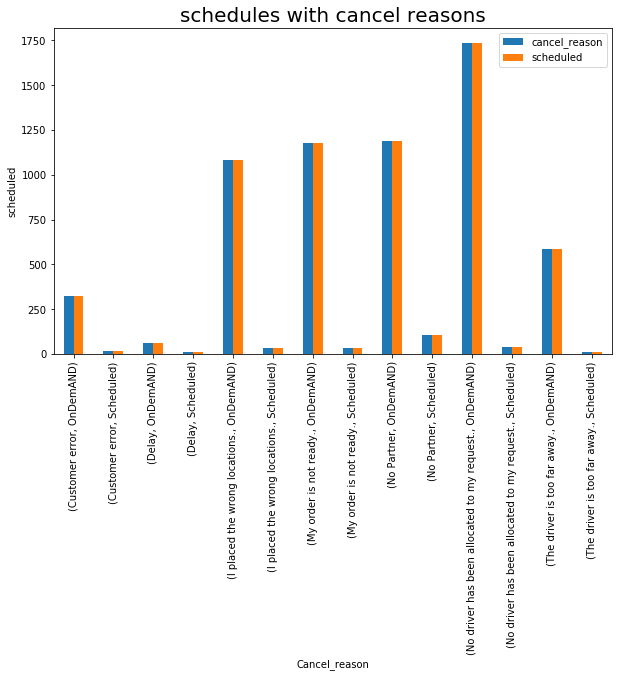

In [23]:
%matplotlib inline
#fig=plt.figure(figsize=(20,10))

from matplotlib.ticker import FuncFormatter
query_df.groupby(['cancel_reason','scheduled'])['cancel_reason','scheduled'].count().plot.bar(figsize=(10,6))

plt.xlabel("Cancel_reason")
plt.ylabel("scheduled")
plt.title('schedules with cancel reasons', fontsize=20)
plt.xticks(rotation = 90);

scheduled
OnDemAND     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
Scheduled    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

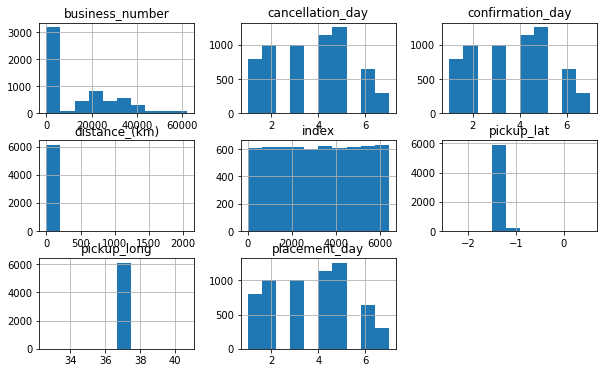

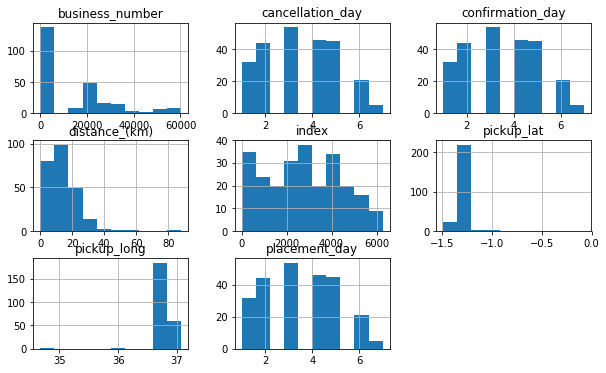

In [24]:
query_df.groupby('scheduled').hist(figsize=(10,6))

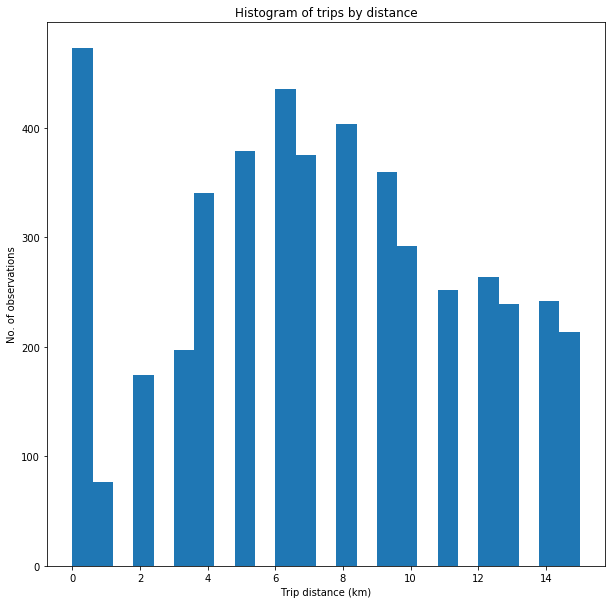

In [25]:
plt.rcParams['figure.figsize'] = (10, 10)
 
plt.hist(query_df['distance_(km)'], bins=25, range=[0, 15]); plt.xlabel('Trip distance (km)')
plt.ylabel('No. of observations'); plt.title('Histogram of trips by distance')
plt.show()
 

 


## check personal or business

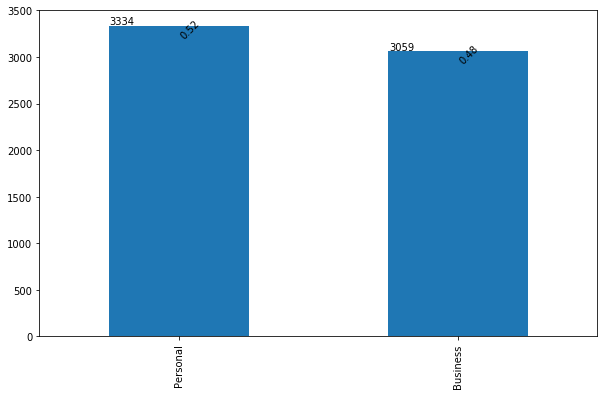

In [26]:
# plot number of trip at each category
fig= plt.figure(figsize=(10,6))
ax = query_df['personal_or_business'].value_counts().plot(kind='bar')

# Add this loop to add the annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

total = float(len(query_df)) # one person per row
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
             ha="left",
            rotation=45,) ##ha= horizontal alignment

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

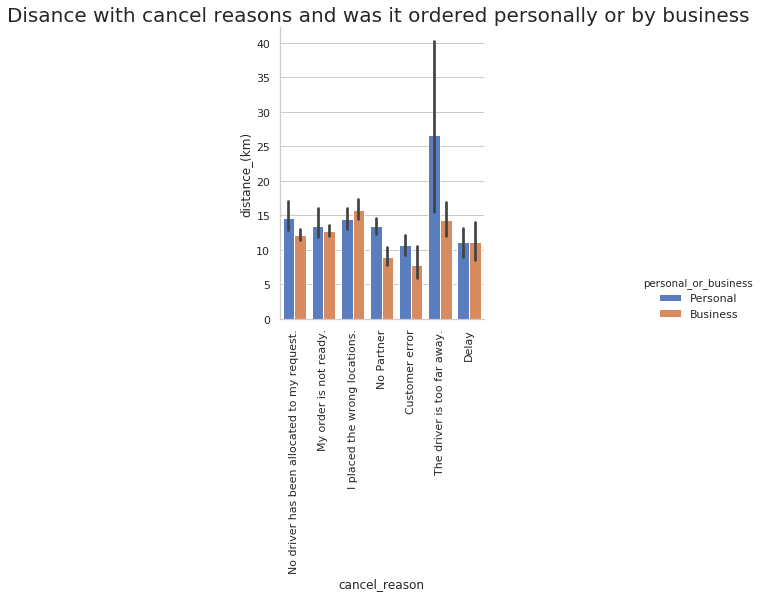

In [27]:
import seaborn as sns
fig= plt.figure(figsize=(15,15))

sns.set(style="whitegrid")
g = sns.factorplot(x="cancel_reason", y="distance_(km)", hue="personal_or_business", data=query_df, kind="bar", palette="muted")
plt.title('Disance with cancel reasons and was it ordered personally or by business ', fontsize=20)
plt.xticks(rotation = 90);

In [28]:
query_df[query_df['personal_or_business']=='Business']['cancel_reason'].value_counts().reset_index().sort_values(by='cancel_reason', ascending=False)#.plot.bar()

,index,cancel_reason
0,No Partner,825
1,No driver has been allocated to my request.,691
2,My order is not ready.,624
3,I placed the wrong locations.,565
4,Customer error,242
5,The driver is too far away.,77
6,Delay,35


In [29]:
query_df[query_df['personal_or_business']=='Personal']['cancel_reason'].value_counts().reset_index().sort_values(by='cancel_reason', ascending=False)#.plot.bar()

,index,cancel_reason
0,No driver has been allocated to my request.,1082
1,My order is not ready.,588
2,I placed the wrong locations.,548
3,The driver is too far away.,517
4,No Partner,468
5,Customer error,95
6,Delay,36


### Type of order, distance  vs cancel reason

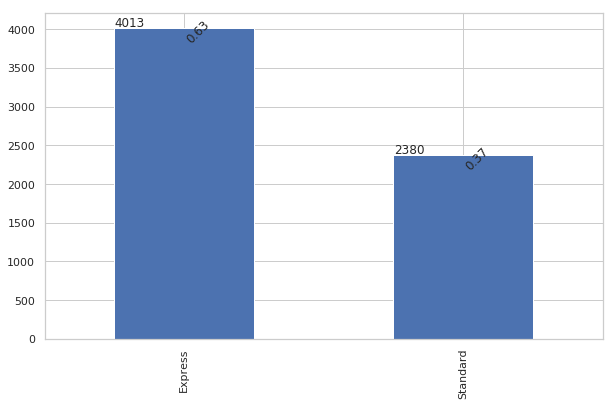

In [30]:
# plot number of trip at each category
fig= plt.figure(figsize=(10,6))
ax = query_df['standard_or_express'].value_counts().plot(kind='bar')

# Add this loop to add the annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

total = float(len(query_df)) # one person per row
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
             ha="left",
            rotation=45,) ##ha= horizontal alignment

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

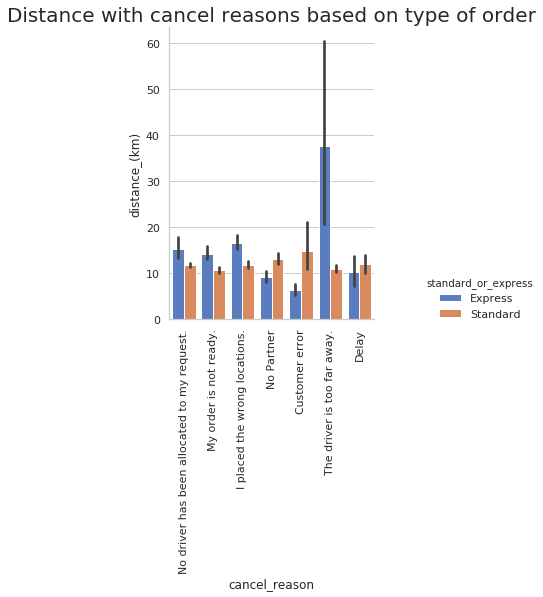

In [31]:
import seaborn as sns
fig= plt.figure(figsize=(15,15))

sns.set(style="whitegrid")
g = sns.factorplot(x="cancel_reason", y="distance_(km)", hue="standard_or_express", data=query_df, kind="bar", palette="muted")
plt.title('Distance with cancel reasons based on type of order', fontsize=20)
plt.xticks(rotation = 90);

### scheduled 

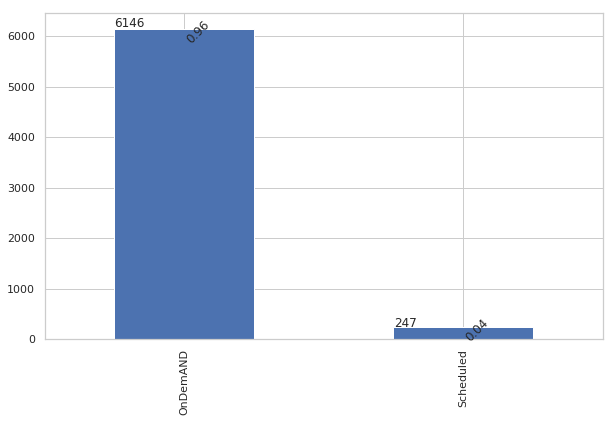

In [32]:
# plot number of trip at each category
fig= plt.figure(figsize=(10,6))
ax = query_df['scheduled'].value_counts().plot(kind='bar')

# Add this loop to add the annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

total = float(len(query_df)) # one person per row
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
             ha="left",
            rotation=45,) ##ha= horizontal alignment

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

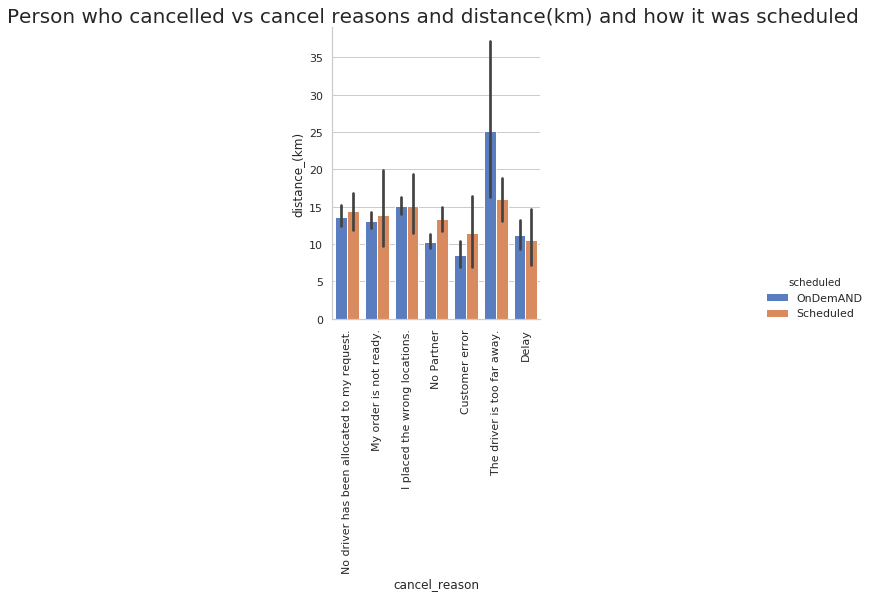

In [33]:
import seaborn as sns
fig= plt.figure(figsize=(15,15))

sns.set(style="whitegrid")
g = sns.factorplot(x="cancel_reason", y="distance_(km)", hue="scheduled", data=query_df, kind="bar", palette="muted")
plt.title('Person who cancelled vs cancel reasons and distance(km) and how it was scheduled ', fontsize=20)
plt.xticks(rotation = 90);

In this graph, we can observe that main reason of order cancellation mainly by the customer was that the driver was too far, prders such as delay, customer error and no partner were cancelled by staff and the rest were done by the customers. 
customer cancellation is observed to be higher than that of the staff members 

## Customer who placed the order

In [34]:
query_df.columns


Index(['index', 'personal_or_business', 'business_number', 'vehicle_type',
       'standard_or_express', 'platform', 'cancel_reason', 'cancelled_by',
       'placement_day', 'placement_time', 'confirmation_day',
       'confirmation_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled'],
      dtype='object')

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

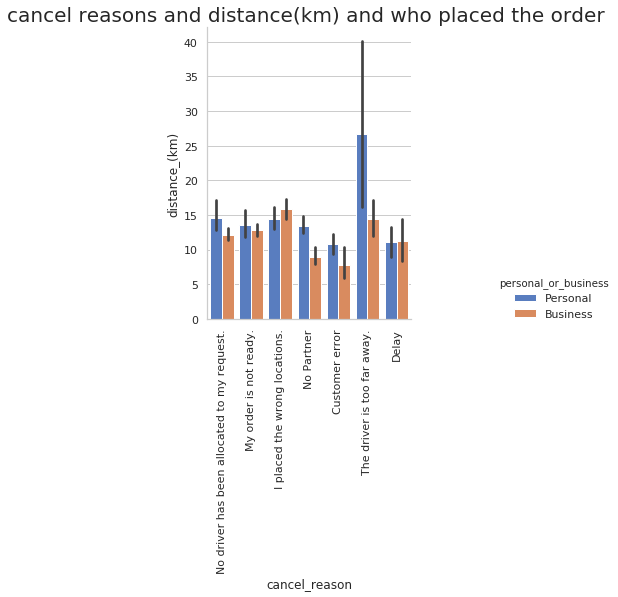

In [35]:
import seaborn as sns
fig= plt.figure(figsize=(15,15))

sns.set(style="whitegrid")
g = sns.factorplot(x="cancel_reason", y="distance_(km)", hue="personal_or_business", data=query_df, kind="bar", palette="muted")
plt.title('cancel reasons and distance(km) and who placed the order ', fontsize=20)
plt.xticks(rotation = 90);

### PLatform

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

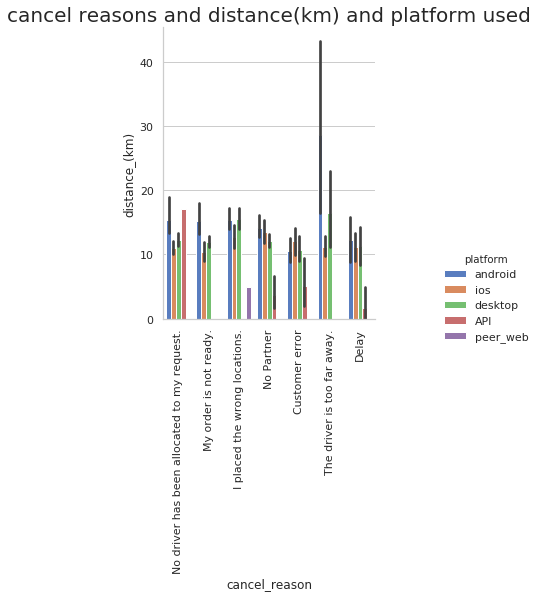

In [36]:
import seaborn as sns
fig= plt.figure(figsize=(15,15))

sns.set(style="whitegrid")
g = sns.factorplot(x="cancel_reason", y="distance_(km)", hue="platform", data=query_df, kind="bar", palette="muted")
plt.title('cancel reasons and distance(km) and platform used', fontsize=20)
plt.xticks(rotation = 90);

# Timelines

**Observe days and time in which orders were placed**

In [37]:
query_df['placement_day'].value_counts()

5    1307
4    1187
3    1055
2    1043
1     832
6     661
7     308
Name: placement_day, dtype: int64

In [38]:
query_df['cancellation_day'].value_counts()

5    1307
4    1187
3    1055
2    1043
1     832
6     661
7     308
Name: cancellation_day, dtype: int64

In [39]:
query_df['confirmation_day'].value_counts()

5    1307
4    1187
3    1055
2    1043
1     832
6     661
7     308
Name: confirmation_day, dtype: int64

### PLot a Line Graph for the Cancellation time 

In [40]:
query_df['cancellation_time'] = pd.to_datetime(query_df['cancellation_time'])
tmp2_df =query_df
tmp2_df = tmp2_df.reset_index()
tmp2_df = tmp2_df.groupby(
    tmp2_df['cancellation_time'].dt.strftime('%H:%M'))['index'].count().reset_index()
tmp2_df
tmp2_df.columns = ['cancellation_time', 'cancel_reason']
tmp2_df[['cancellation_time', 'cancel_reason']].to_csv("tmp2_df.csv", sep=",")

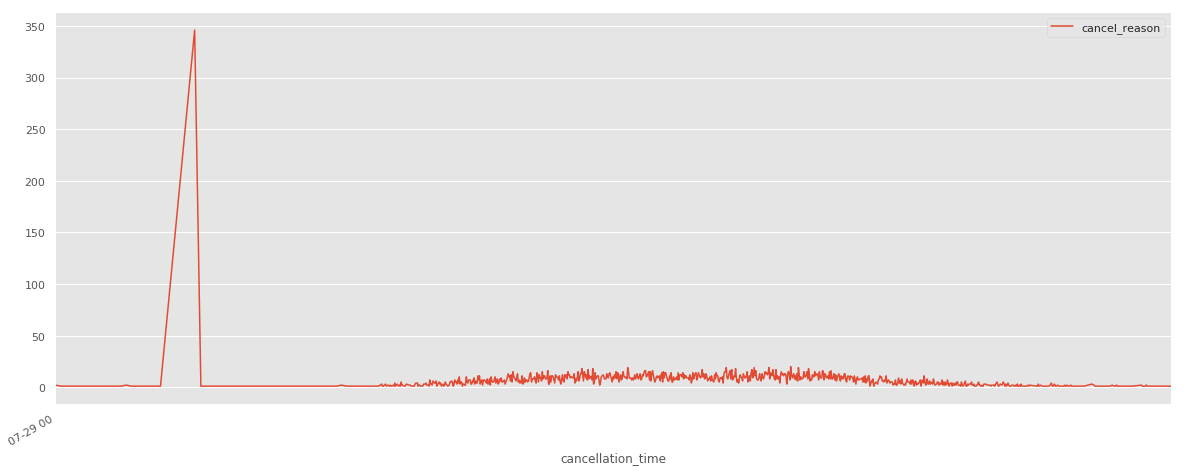

In [41]:
import matplotlib.dates as mdates
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

#read data from csv
tmp2_df = pd.read_csv('tmp2_df.csv', usecols=['cancellation_time', 'cancel_reason'], parse_dates=['cancellation_time'], sep=",")

#set date as index
tmp2_df.set_index('cancellation_time', inplace=True)

#plot data
fig, ax = plt.subplots(figsize=(20,8))
#ax.bar(tmp2_df.index, tmp2_df['name'])
tmp2_df.plot(ax=ax)

#set ticks every hour
#format date
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=2))


**Change the timelines to pandas datetime**

In [42]:
query_df['placement_time'] = pd.to_datetime(query_df['placement_time'])
query_df['confirmation_time'] = pd.to_datetime(query_df['confirmation_time'])


**create new columns in regards to timelines**

In [43]:
#column represents the time difference between when order was placed and when it was confirmed
query_df['order_timedelta'] = query_df['placement_time']-query_df['confirmation_time']

In [44]:
#column represents the time difference between when order was placed and when it was cancelled
query_df['processing_timedelta']=query_df['placement_time']-query_df['cancellation_time']

In [45]:
#column represents the time difference between when order was confirmed and when it was confirmed
query_df['confirmation_timedelta']=query_df['confirmation_time']-query_df['cancellation_time']

**Display the timeline observations taken before an order was cancelled**

In [46]:
#Its observed that the highest duration between when order was placed and when it was confirmed was 16hrs, 30 min,24 seconds. 
#The average time taken for was 23 hours 38 min 38 seconds.
query_df['order_timedelta'].describe()

count                        2879
mean     -1 days +23:38:38.683570
std        0 days 01:21:21.356310
min             -1 days +14:59:09
25%      -1 days +23:35:58.500000
50%             -1 days +23:56:58
75%             -1 days +23:59:17
max               0 days 16:30:24
Name: order_timedelta, dtype: object

In [47]:
##Its observed that the highest duration between when order was placed and when it was confirmed was 20hrs, 55 min,44 seconds. 
#The average time taken for was 06 min 38 seconds.

query_df['processing_timedelta'].describe()

count                      6393
mean     0 days 00:06:09.024870
std      0 days 03:33:11.244996
min           -1 days +12:58:51
25%           -1 days +23:16:10
50%           -1 days +23:50:28
75%           -1 days +23:58:58
max             0 days 20:55:44
Name: processing_timedelta, dtype: object

In [48]:
##Its observed that the highest duration between when order was placed and when it was confirmed was 17hrs, 11 min,35 seconds. 
#The average time taken for was 23hrs, 41 min 56 seconds.

query_df['confirmation_timedelta'].describe()

count                        2879
mean     -1 days +23:41:56.723167
std        0 days 02:01:34.939269
min             -1 days +13:01:48
25%             -1 days +23:18:33
50%             -1 days +23:44:11
75%             -1 days +23:57:02
max               0 days 17:11:35
Name: confirmation_timedelta, dtype: object

In [49]:
query_df.head()

,index,personal_or_business,business_number,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,confirmation_day,confirmation_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled,order_timedelta,processing_timedelta,confirmation_timedelta
0,0,Personal,-1.0,Bike,Express,android,No driver has been allocated to my request.,Customer,1,2019-07-29 17:55:38,1,NaT,1,2019-07-29 17:56:35,9,-1.313053,36.841437,OnDemAND,NaT,-1 days +23:59:03,NaT
1,1,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,2019-07-29 12:26:27,1,2019-07-29 12:27:36,1,2019-07-29 12:28:44,14,-1.318959,36.853394,OnDemAND,-1 days +23:58:51,-1 days +23:57:43,-1 days +23:58:52
2,2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1,2019-07-29 13:21:18,1,2019-07-29 13:21:34,1,2019-07-29 13:47:29,16,-1.313854,36.706867,OnDemAND,-1 days +23:59:44,-1 days +23:33:49,-1 days +23:34:05
3,3,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,2019-07-29 10:29:19,1,NaT,1,2019-07-29 10:29:29,20,-1.206197,36.778776,OnDemAND,NaT,-1 days +23:59:50,NaT
4,4,Personal,-1.0,Bike,Standard,ios,No Partner,Staff,1,2019-07-29 14:34:05,1,2019-07-29 14:59:08,1,2019-07-29 15:49:41,11,-1.296958,36.808166,OnDemAND,-1 days +23:34:57,-1 days +22:44:24,-1 days +23:09:27


**Create new columns in regards to days**

In [50]:
#create column that shows the order period 

query_df['order_period'] = query_df['placement_day']-query_df['confirmation_day']

In [51]:
#create column that shows the processing period 
query_df['processing_period']=query_df['placement_day']-query_df['cancellation_day']


In [52]:
#create column that shows the confirmation period 
query_df['confirmation_period']=query_df['confirmation_day']-query_df['cancellation_day']


In [53]:
query_df['confirmation_period'].value_counts()

0    6393
Name: confirmation_period, dtype: int64

In [54]:
#Create a plotting dataframe with counts (number of orders placed) grouped by day:
byplacementDay = query_df.groupby('placement_day')['business_number'].count() #365 complete entries
byplacementDay.head(8)

placement_day
1     832
2    1043
3    1055
4    1187
5    1307
6     661
7     308
Name: business_number, dtype: int64

In [55]:
#Create a plotting dataframe with counts (number of orders confirmed) grouped by day:
byplacementDay = query_df.groupby('confirmation_day')['business_number'].count() #365 complete entries
byplacementDay.head(8)

confirmation_day
1     832
2    1043
3    1055
4    1187
5    1307
6     661
7     308
Name: business_number, dtype: int64

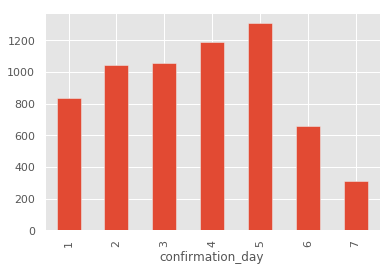

In [56]:
#bar representation
byplacementDay.plot.bar()

### pickup Longitude and latitude

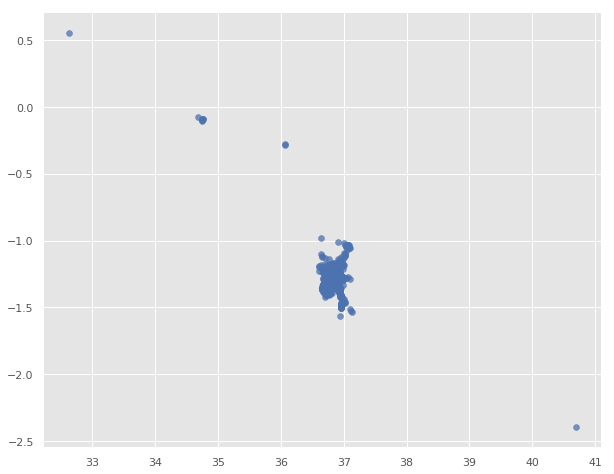

In [57]:
plt.figure(figsize=(10,8))
samples = np.random.choice(query_df.index, 6300, replace=False)
 
plt.scatter(query_df['pickup_long'][samples], query_df['pickup_lat'][samples], c='b', alpha=0.75)
plt.show()

**Discussion**

The diagram above shows that the pick up points were mainly concentrates at one are from longitude 36-37 and from latitude -1.0 to -1.5. mainly like one pickup location

In [58]:
query_df.columns

Index(['index', 'personal_or_business', 'business_number', 'vehicle_type',
       'standard_or_express', 'platform', 'cancel_reason', 'cancelled_by',
       'placement_day', 'placement_time', 'confirmation_day',
       'confirmation_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled',
       'order_timedelta', 'processing_timedelta', 'confirmation_timedelta',
       'order_period', 'processing_period', 'confirmation_period'],
      dtype='object')

## Visualization of Distance (km)

In [113]:
#display the largest distance recorded for orders
query_df['distance_(km)'].value_counts().nlargest()

0    473
6    436
8    404
5    379
7    375
Name: distance_(km), dtype: int64

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


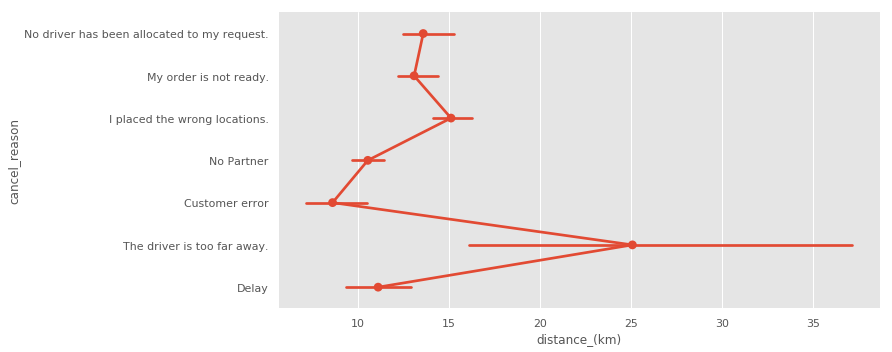

In [109]:
#plot a factor plot displaying the reasons for cancelling orders in regards to distance
axes = sns.factorplot('distance_(km)','cancel_reason', 
                      data=query_df, aspect = 2.5, rotation=90)

In [75]:
#Vey long distance trips (>= 200 km):
dist_df= query_df[query_df['distance_(km)'] >= 200].head(10) #45 total

In [90]:
dist_df.head()

,index,personal_or_business,business_number,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,confirmation_day,confirmation_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled,order_timedelta,processing_timedelta,confirmation_timedelta,order_period,processing_period,confirmation_period
344,344,Business,29068.0,Bike,Standard,API,No Partner,Staff,1,2019-07-29 10:52:09,1,NaT,1,2019-07-29 10:53:36,264,-1.282189,36.825190,OnDemAND,NaT,-1 days +23:58:33,NaT,0,0,0
356,356,Business,29068.0,Bike,Standard,API,Customer error,Staff,1,2019-07-29 10:34:15,1,NaT,1,2019-07-29 10:45:30,264,-1.287389,36.823890,OnDemAND,NaT,-1 days +23:48:45,NaT,0,0,0
2816,2816,Business,48160.0,Bike,Express,desktop,I placed the wrong locations.,Customer,3,2019-07-29 09:33:31,3,2019-07-29 09:35:23,3,2019-07-29 09:53:34,228,-1.320502,36.916882,OnDemAND,-1 days +23:58:08,-1 days +23:39:57,-1 days +23:41:49,0,0,0
2954,2954,Business,29068.0,Bike,Express,API,No Partner,Staff,3,2019-07-29 09:29:49,3,2019-07-29 10:03:13,3,2019-07-29 10:12:50,231,-1.280194,36.826795,OnDemAND,-1 days +23:26:36,-1 days +23:16:59,-1 days +23:50:23,0,0,0
2955,2955,Business,29068.0,Bike,Express,API,No Partner,Staff,3,2019-07-29 08:13:04,3,2019-07-29 09:54:25,3,2019-07-29 10:05:49,231,-1.279394,36.817595,OnDemAND,-1 days +22:18:39,-1 days +22:07:15,-1 days +23:48:36,0,0,0


In [92]:
dist_df.groupby(['cancel_reason','platform'])['platform'].count() 

cancel_reason                  platform
Customer error                 API         1
I placed the wrong locations.  desktop     1
No Partner                     API         3
                               android     1
The driver is too far away.    android     4
Name: platform, dtype: int64

In [93]:
dist2_df=query_df[query_df['distance_(km)'] < 25] #oduration whose distance  is lesser than 25 miles
dist2_df.head()

,index,personal_or_business,business_number,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,confirmation_day,confirmation_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled,order_timedelta,processing_timedelta,confirmation_timedelta,order_period,processing_period,confirmation_period
0,0,Personal,-1.0,Bike,Express,android,No driver has been allocated to my request.,Customer,1,2019-07-29 17:55:38,1,NaT,1,2019-07-29 17:56:35,9,-1.313053,36.841437,OnDemAND,NaT,-1 days +23:59:03,NaT,0,0,0
1,1,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,2019-07-29 12:26:27,1,2019-07-29 12:27:36,1,2019-07-29 12:28:44,14,-1.318959,36.853394,OnDemAND,-1 days +23:58:51,-1 days +23:57:43,-1 days +23:58:52,0,0,0
2,2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1,2019-07-29 13:21:18,1,2019-07-29 13:21:34,1,2019-07-29 13:47:29,16,-1.313854,36.706867,OnDemAND,-1 days +23:59:44,-1 days +23:33:49,-1 days +23:34:05,0,0,0
3,3,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,2019-07-29 10:29:19,1,NaT,1,2019-07-29 10:29:29,20,-1.206197,36.778776,OnDemAND,NaT,-1 days +23:59:50,NaT,0,0,0
4,4,Personal,-1.0,Bike,Standard,ios,No Partner,Staff,1,2019-07-29 14:34:05,1,2019-07-29 14:59:08,1,2019-07-29 15:49:41,11,-1.296958,36.808166,OnDemAND,-1 days +23:34:57,-1 days +22:44:24,-1 days +23:09:27,0,0,0


In [129]:
query_df['distance_(km)']=query_df[query_df['distance_(km)']<=200]

**Discussion**

It can be observed that there were 10 orders made at a distance of over or equal to 200 km. Mainly done for express order. Their main reason for cancellation was the driver is too far away. This shows that deliveries should be done from a close proximity to the customers thus have more delivery centres.

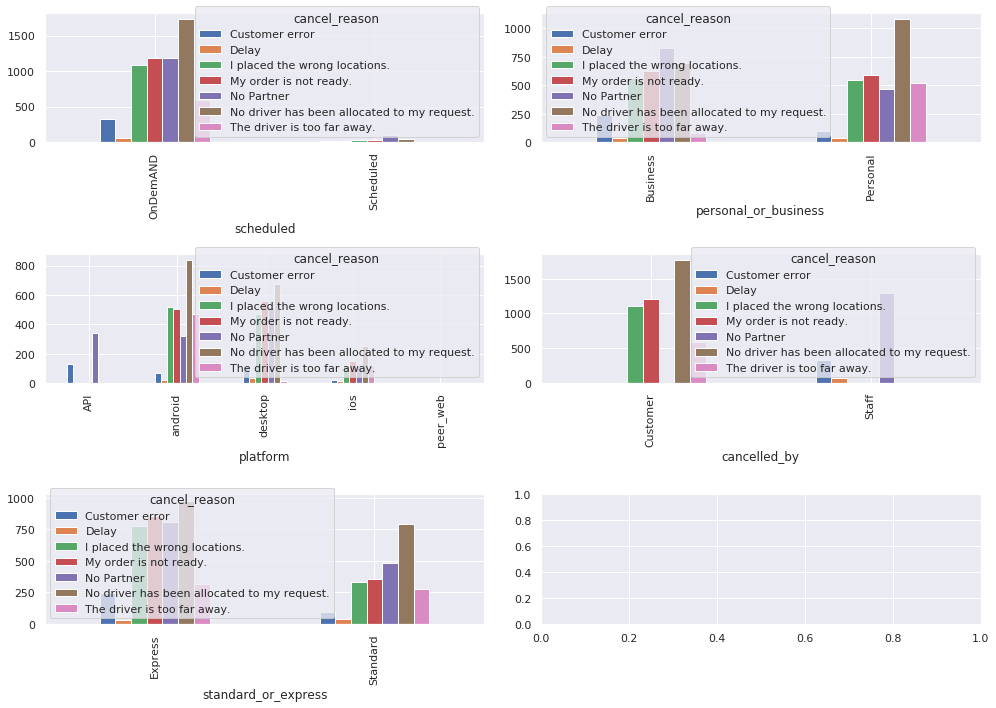

In [136]:
# Plot dual axis bar chart for those who cancelled
fig, axes = plt.subplots(3, 2, figsize=(14,14))

# scheduled factor dual axis bar chart for those who cancelled order
pd.crosstab(query_df.scheduled,query_df.cancel_reason).plot(kind='bar',figsize=(14,10), ax=axes[0, 0])
# personal_or_business factor dual axis bar chart for those who cancelled order
pd.crosstab(query_df.personal_or_business,query_df.cancel_reason).plot(kind='bar',figsize=(14,10), ax=axes[0, 1])
# platform type dual axis bar chart for those who cancelled order
pd.crosstab(query_df.platform,query_df.cancel_reason).plot(kind='bar',figsize=(14,10), ax=axes[1, 0])
# Cancelled_by factor dual axis bar chart for those who cancelled order
pd.crosstab(query_df.cancelled_by,query_df.cancel_reason).plot(kind='bar',figsize=(14,10), ax=axes[1, 1])
# standard_or_express factor dual axis bar chart for those who cancelled order
pd.crosstab(query_df.standard_or_express,query_df.cancel_reason).plot(kind='bar',figsize=(14,10), ax=axes[2, 0])

fig.tight_layout()

# Recommendation

1. Main insight to give is to improve on the driver allocation by allocating drivers who are at a close distance with the customer so as to reduce the number of customers cancelling orders.

2. Provide more pick up points to reduce the the distance for the driver thus making the deliveries efficient and faster.


# Export CSV

In [94]:
query_df.to_csv("../Sendy_data/prediction_df.csv", sep=",", index=False)